In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

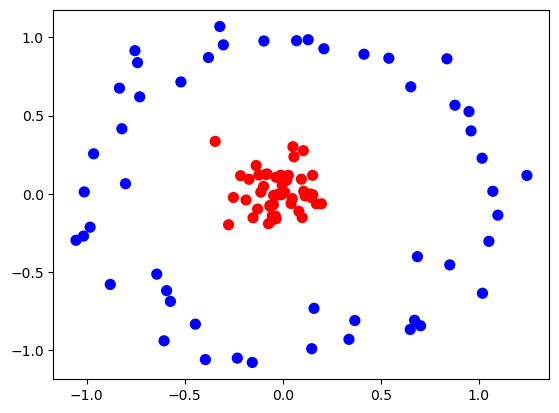

In [8]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

# Plotting the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.45

- From Above you can see that for linear kernel function the accuracy is only 0.45. Since the Data is non-linear accuracy is too linear for linear kernel function
- Need to transform lower dimension data into higher dimensional space.

In [18]:
zero_one_colourmap = ListedColormap(['blue', 'red'])
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_1684\656660398.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


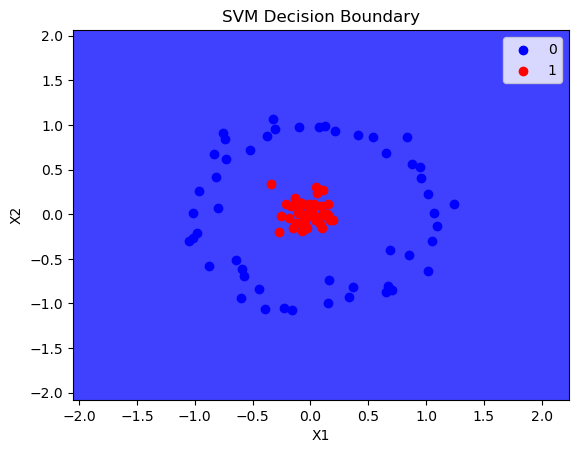

In [19]:
plot_decision_boundary(X, y, classifier)

In [20]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

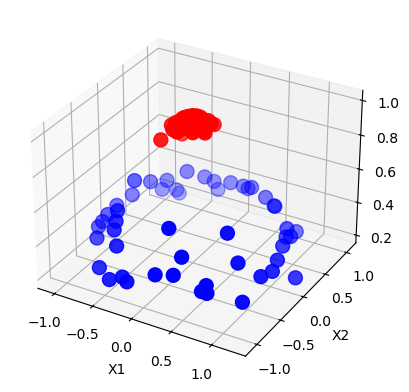

In [21]:
plot_3d_plot(X,y)

- From above graph you can see that , we have converted the lower dimension data into higher dimension data using RBF function , for separating the data.

In [32]:
#kernel:{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

1.0

- from above you can see that by applying a RBF kernel function the acuracy increased to 1.0 and separated the non-linear data in higgher dimensional space.

C:\Users\acer\AppData\Local\Temp\ipykernel_1684\656660398.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


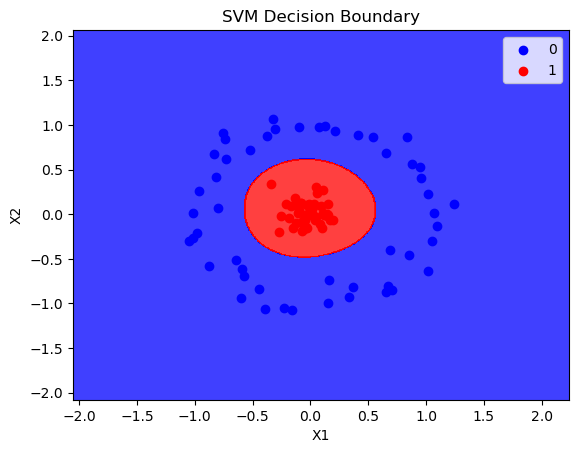

In [24]:
plot_decision_boundary(X, y, rbf_classifier)

In [25]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\acer\AppData\Local\Temp\ipykernel_1684\656660398.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


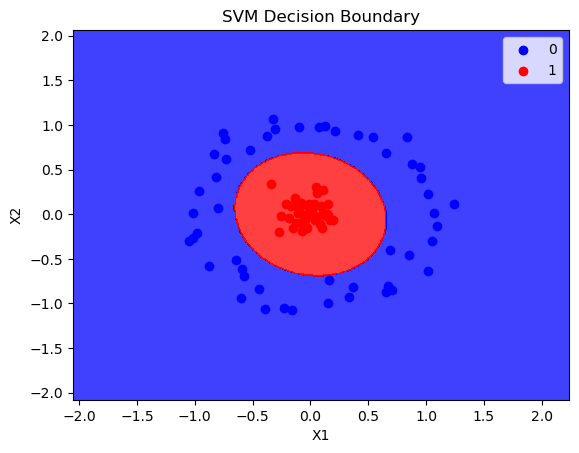

In [27]:
plot_decision_boundary(X, y, poly_classifier)

In [28]:
X

array([[-1.05376765, -0.29699101],
       [ 0.95952722,  0.40204305],
       [ 1.07080711,  0.01606684],
       [ 0.04235564, -0.06226291],
       [ 1.09634094, -0.13675545],
       [-1.01189106,  0.01205601],
       [ 0.54075594,  0.86631612],
       [-0.03375393, -0.15925343],
       [-0.96413668,  0.25542733],
       [ 0.11432284, -0.01391561],
       [ 0.17126011, -0.0641719 ],
       [-0.12161495,  0.12014471],
       [-0.59201089, -0.61910916],
       [-0.13551981,  0.18060571],
       [-0.17192501,  0.09269125],
       [ 0.12944573,  0.98442981],
       [-0.87914717, -0.57938452],
       [ 0.14022337, -0.00158734],
       [-0.21469825,  0.11538943],
       [-0.2516565 , -0.02378589],
       [ 0.8776746 ,  0.56599729],
       [-0.15551358, -1.07810052],
       [-0.82000291,  0.41554054],
       [-0.34457677,  0.33471934],
       [-0.00709915, -0.00545748],
       [-0.09605096,  0.97653965],
       [-0.44537371, -0.83336741],
       [-0.83232737,  0.67502953],
       [-1.01557684,

In [29]:
np.exp(-(X**2)).sum(1)

array([1.24499291, 1.24899177, 1.3174482 , 1.99433844, 1.28207515,
       1.35903758, 1.21858592, 1.97381857, 1.3315672 , 1.9868217 ,
       1.96698636, 1.97098757, 1.38596312, 1.94970982, 1.9623195 ,
       1.36280699, 1.17651962, 1.98052694, 1.94172444, 1.93806713,
       1.18876111, 1.28887139, 1.35189143, 1.78205589, 1.99991982,
       1.37615646, 1.31939985, 1.13421549, 1.28604578, 1.15692444,
       1.34367192, 1.9425362 , 1.96732417, 1.22097358, 1.98825647,
       1.9774349 , 1.98588225, 1.9160401 , 1.96328145, 1.39250017,
       1.98778265, 1.99685652, 1.97688858, 1.97846035, 1.99670269,
       1.99982361, 1.97761235, 1.29785677, 1.97423995, 1.91078239,
       1.12717693, 1.97764479, 1.98930768, 1.98745275, 1.1989091 ,
       1.30577106, 1.95404346, 0.97154913, 1.88811406, 1.95785395,
       1.52193565, 1.9985432 , 1.99772658, 1.36373756, 1.10706179,
       1.07325861, 1.33505838, 1.29395795, 1.3534963 , 1.31328164,
       1.18147424, 1.47525221, 1.98999685, 1.02253053, 1.96396

In [30]:
X_new=np.exp(-(X**2))

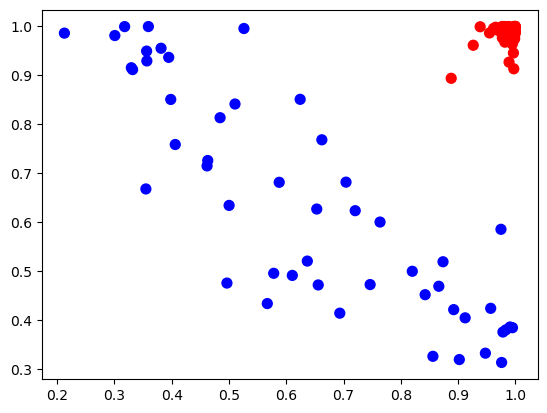

In [31]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')

# Conclude